## This script helps understand how to read and use a netcdf
#### Import some packages so you don't have to code from scratch

In [1]:
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#### Check if the path exists

In [3]:
print(os.path.exists('Training Data/ang20231109t074932_002_L2A_OE_0b4f48b4_RFL_ORT.nc'))

True


#### Read in the netcdf and call it ds

In [4]:
fn = 'Training Data/ang20231109t074932_002_L2A_OE_0b4f48b4_RFL_ORT.nc'
ds = nc.Dataset(fn)

#### Learn about some of the attributes of the data

In [5]:
print(ds)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    date_created: 2024-11-27T01:35:58Z
    summary: The Airborne Visible / Infrared Imaging Spectrometer - Next Generation (AVIRIS-NG) is part of NASA’s Airborne Science Program (ASP) and the Jet Propulsion Laboratory’s (JPL) Earth Science Airborne Program. AVIRIS-NG is the successor to AVIRIS-Classic and provides high signal-to-noise ratio imaging spectroscopy measurements in 425 contiguous spectral channels with wavelengths in the solar reflected spectral range (380-2510 nm).
    keywords: Imaging Spectroscopy, AVIRIS, AVIRIS-NG
    sensor: Airborne Visible / Infrared Imaging Spectrometer Next Generation
    instrument: AVIRIS-NG
    platform: Gulfstream III
    institution: NASA Jet Propulsion Laboratory/California Institute of Technology
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    creator_name: Jet Propulsion Laboratory/California Institu

In [22]:
print(ds.__dict__)

{'Conventions': 'CF-1.6', 'date_created': '2024-11-27T01:35:33Z', 'summary': 'The Airborne Visible / Infrared Imaging Spectrometer - Next Generation (AVIRIS-NG) is part of NASA’s Airborne Science Program (ASP) and the Jet Propulsion Laboratory’s (JPL) Earth Science Airborne Program. AVIRIS-NG is the successor to AVIRIS-Classic and provides high signal-to-noise ratio imaging spectroscopy measurements in 425 contiguous spectral channels with wavelengths in the solar reflected spectral range (380-2510 nm).', 'keywords': 'Imaging Spectroscopy, AVIRIS, AVIRIS-NG', 'sensor': 'Airborne Visible / Infrared Imaging Spectrometer Next Generation', 'instrument': 'AVIRIS-NG', 'platform': 'Gulfstream III', 'institution': 'NASA Jet Propulsion Laboratory/California Institute of Technology', 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords', 'creator_name': 'Jet Propulsion Laboratory/California Institute of Technology', 'creator_url': 'aviris.jpl.nasa.gov', 'publisher_

In [23]:
for dim in ds.dimensions.values():
    print(dim)

"<class 'netCDF4.Dimension'>": name = 'easting', size = 1657
"<class 'netCDF4.Dimension'>": name = 'northing', size = 858


In [24]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4.Variable'>
float64 easting(easting)
    description: UTM easting coordinate for center of grid cell for orthocorrected pixel location
    standard_name: projection_x_coordinate
    long_name: X coordinate of projection
    units: m
    axis: X
unlimited dimensions: 
current shape = (1657,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4.Variable'>
float64 northing(northing)
    description: UTM northing coordinate for center of grid cell for orthocorrected pixel location
    standard_name: projection_y_coordinate
    long_name: Y coordinate of projection
    units: m
    axis: Y
unlimited dimensions: 
current shape = (858,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4.Variable'>
|S1 transverse_mercator()
    grid_mapping_name: transverse_mercator
    longitude_of_central_meridian: 21.0
    false_easting: 500000.0
    false_northing: 10000000.0
    latitude_of_projection_origin: 0.0
    scale_factor_at_central_

In [25]:
ds.groups['reflectance'].variables.keys()


dict_keys(['wavelength', 'fwhm', 'reflectance'])

In [26]:
rfl = ds.groups['reflectance'].variables['reflectance']
print(rfl.dimensions)  # likely something like ('band', 'northing', 'easting')
print(rfl.shape)       # shape of the data cube

('wavelength', 'northing', 'easting')
(425, 858, 1657)


#### Show me all the wavelengths that there are bands for?

![UV-VIS-NIR Spectrum](https://www.gigahertz-optik.com/assets/UVVISNIR_1__ResizedImageWzYwMCwzNTld.jpg)


In [27]:
wvl = ds.groups['reflectance'].variables['wavelength'][:]
print(wvl)


[ 377.19565  382.20566  387.21564  392.22565  397.22565  402.23566
  407.24564  412.25565  417.26566  422.27563  427.28564  432.29565
  437.29565  442.30566  447.31564  452.32565  457.33566  462.34564
  467.35565  472.35565  477.36566  482.37564  487.38565  492.39566
  497.40564  502.41565  507.42566  512.42566  517.43567  522.4457
  527.4556   532.46564  537.47565  542.48566  547.48566  552.49567
  557.5057   562.5156   567.52563  572.53564  577.54565  582.55566
  587.55566  592.5657   597.5756   602.58563  607.59564  612.60565
  617.61566  622.61566  627.6257   632.6356   637.6456   642.65564
  647.66565  652.67566  657.68567  662.68567  667.6957   672.7056
  677.71564  682.72565  687.73566  692.74567  697.74567  702.7557
  707.7656   712.77563  717.78564  722.79565  727.80566  732.8157
  737.8157   742.8256   747.83563  752.84564  757.85565  762.86566
  767.8757   772.8757   777.8856   782.8956   787.90564  792.91565
  797.92566  802.93567  807.9457   812.9457   817.9556   822.96564

#### Now let's make a plot with specific wavelengths from the output above

In [28]:
#List reflectance varibales and wavelength
rfl = ds.groups['reflectance'].variables['reflectance']
wvl = ds.groups['reflectance'].variables['wavelength'][:]

#Select bands (closest to 860, 665, 560 nm) # this arg min does that function, but you should pick the bands you think are best
band_r = np.argmin(np.abs(wvl - 858))   # NIR
band_g = np.argmin(np.abs(wvl - 667))   # Red
band_b = np.argmin(np.abs(wvl - 562))   # Green

#Extract and normalize for RGB image
r = rfl[band_r, :, :]
g = rfl[band_g, :, :]
b = rfl[band_b, :, :]

# Stack and normalize
rgb = np.stack([r, g, b], axis=-1)
rgb = np.clip(rgb / 0.3, 0, 1)  # Adjust stretch as needed



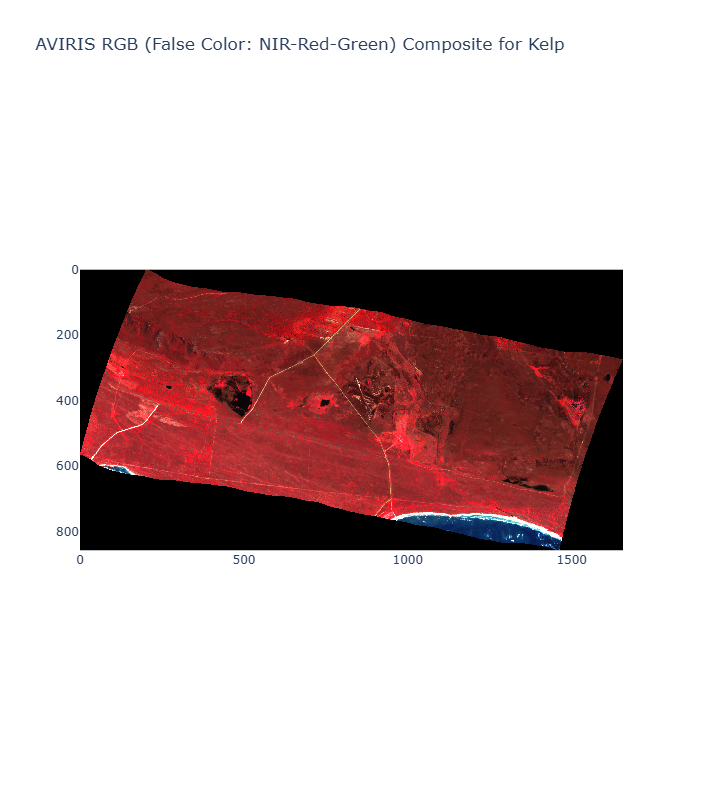

In [29]:
# Make sure rgb is in range 0–255 for Plotly (uint8)
rgb_plot = (rgb * 255).astype(np.uint8)

# Create Plotly figure
fig = px.imshow(rgb_plot, title="AVIRIS RGB (False Color: NIR-Red-Green) Composite for Kelp")
fig.update_layout(
    dragmode="zoom", 
    width=800, 
    height=800
)
fig.show()
